In [6]:
import xarray as xr
import rasterio

import pandas as pd

Note: Accessing by URL is nice but I need to figure out how to use auth. I'm not going to be able to get past any of the NASA endpoints without inputting my earthdata login.

https://github.com/pydata/xarray/issues/1068

# Google Cloud

- [Data Catalog](https://console.cloud.google.com/marketplace/browse?filter=solution-type:dataset&filter=category:climate)

GOES 16, EPA Historical Air Quality, Landsat, modis-terra-npp, sentinel2

## Landsat

Index file https://storage.googleapis.com/gcp-public-data-landsat/index.csv.gz
(wasn't able to exand the .gz. Revisit later if using.)

In [3]:
# Download the index file
!wget https://storage.googleapis.com/gcp-public-data-landsat/index.csv.gz

--2022-04-22 20:55:46--  https://storage.googleapis.com/gcp-public-data-landsat/index.csv.gz
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.188.208, 172.253.63.128, 172.253.122.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.188.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 767466786 (732M) [text/csv]
Saving to: ‘index.csv.gz’

index.csv.gz        100%[===================>] 731.91M  14.0MB/s    in 68s     

2022-04-22 20:56:55 (10.7 MB/s) - ‘index.csv.gz’ saved [767466786/767466786]



[Article](https://docs.dea.ga.gov.au/notebooks/Frequently_used_code/Opening_GeoTIFFs_NetCDFs.html) with good examples of opening landsat files with xarray.  Includes opening 1 file and also auto-stacking multiple bands (!)

In [8]:
xr.open_rasterio('https://storage.googleapis.com/gcp-public-data-landsat/LT08/01/018/037/LT08_L1GT_018037_20130313_20170310_01_T2/LT08_L1GT_018037_20130313_20170310_01_T2_B10.TIF')

/var/folders/f8/rh42xb3d1tnbw2bxsjwgym1c0000gn/T/ipykernel_2220/332819594.py:1: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  xr.open_rasterio('https://storage.googleapis.com/gcp-public-data-landsat/LT08/01/018/037/LT08_L1GT_018037_20130313_20170310_01_T2/LT08_L1GT_018037_20130313_20170310_01_T2_B10.TIF')


<xarray.DataArray (band: 1, y: 7741, x: 7471)>
[57833011 values with dtype=uint16]
Coordinates:
  * band     (band) int64 1
  * y        (y) float64 3.79e+06 3.79e+06 3.79e+06 ... 3.558e+06 3.558e+06
  * x        (x) float64 1.548e+05 1.548e+05 1.549e+05 ... 3.789e+05 3.789e+05
Attributes:
    transform:      (30.0, 0.0, 154785.0, 0.0, -30.0, 3789915.0)
    crs:            +init=epsg:32617
    res:            (30.0, 30.0)
    is_tiled:       1
    nodatavals:     (nan,)
    scales:         (1.0,)
    offsets:        (0.0,)
    AREA_OR_POINT:  Point

In [7]:
# Works! (This is a random file and variable.  Would be nice to find a meaningful one.)
rasterio.open('https://storage.googleapis.com/gcp-public-data-landsat/LT08/01/018/037/LT08_L1GT_018037_20130313_20170310_01_T2/LT08_L1GT_018037_20130313_20170310_01_T2_B10.TIF')

<open DatasetReader name='https://storage.googleapis.com/gcp-public-data-landsat/LT08/01/018/037/LT08_L1GT_018037_20130313_20170310_01_T2/LT08_L1GT_018037_20130313_20170310_01_T2_B10.TIF' mode='r'>

# AWS

- [Registry](https://registry.opendata.aws/)

MUR, WOCE, NOAA Coastal Lidar, 

# Airborne Campaign

- [Airborne Science campaign page](https://airbornescience.nasa.gov/program/airborne_missions)
- Field campaign page
Campaign pages: have overview and meterology information. Then there is observation data. Seperated often by instrument which, as you, know, may have several kinds of measurements.

Activate seems like a good one. Find a file with maybe AOD and download here https://www-air.larc.nasa.gov/cgi-bin/ArcView/activate.2021?UC12=1

In [13]:
# Activate aerosol data
pd.read_csv('enzFile?d49EE03EFAE02C04F06E9647DAF98F48D6A2f7075622d6169722f5846532f41435449564154452f323032312f4b494e472d4149525f41495243524146542f434149524e532e425249414e2f41435449564154452d5253502d575452434c445f554331325f32303231303633305f52312e696', skiprows=46)

,Time_start,Time_stop,Lat,Lon,CTH_stereo,COT,Reff,Reff_unc,Veff,Veff_unc,COT_rad_1590,Reff_rad_1590,COT_rad_2260,Reff_rad_2260
0,47828.6,47829.4,36.9524,-72.6376,-0.0001,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1,47829.4,47830.3,36.9526,-72.6365,-0.0001,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
2,47830.3,47831.1,36.9529,-72.6355,-0.0000,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
3,47831.1,47831.9,36.9532,-72.6345,-0.0000,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
4,47831.9,47832.8,36.9534,-72.6334,0.0000,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16793,70786.2,70787.1,36.9333,-72.6521,-0.0001,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
16794,70787.1,70787.9,36.9337,-72.6532,-0.0001,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
16795,70787.9,70788.7,36.9341,-72.6542,-0.0001,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
16796,70788.7,70789.6,36.9345,-72.6552,-0.0002,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0


# PO DAAC
https://podaac.jpl.nasa.gov/

- OpenDAP & FTP server https://opendap.jpl.nasa.gov/opendap/


In [15]:
aviso = xr.open_dataset('https://opendap.jpl.nasa.gov/opendap/SeaSurfaceTopography/aviso/L4/dynamic_topo_1deg_1mo/zosNobs_AVISO_L4_199210-201012.nc')

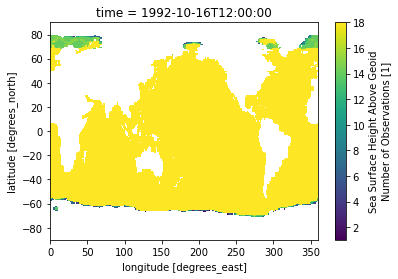

In [24]:
# Not highly interesting, but it works!
aviso.zosNobs.isel(time=0).plot()

In [26]:
# Same file but with the THREDDS server
aviso = xr.open_dataset('https://thredds.jpl.nasa.gov/opendap/SeaSurfaceTopography/aviso/L4/dynamic_topo_1deg_1mo/zosNobs_AVISO_L4_199210-201012.nc')

## Earthdata examples

In [1]:
# This is behind auth
xr.open_dataset('https://e4ftl01.cr.usgs.gov/MOTA/MCD12Q1.006/2019.01.01/MCD12Q1.A2019001.h03v06.006.2020212125444.hdf', engine='h5netcdf')


NameError: name 'xr' is not defined